## Dataset Information<br>
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.<br>

### Content
There are 25 variables: <br>

<b>ID</b>: ID of each client<br>
<b>LIMIT_BAL</b>: Amount of given credit in NT dollars (includes individual and family/supplementary credit<br>
<b>SEX</b>: Gender (1=male, 2=female)<br>
<b>EDUCATION</b>: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
<b>MARRIAGE</b>: Marital status (1=married, 2=single, 3=others)<br>
<b>AGE</b>: Age in years<br>
<b>PAY_0</b>: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
<b>PAY_2</b>: Repayment status in August, 2005 (scale same as above)<br>
<b>PAY_3</b>: Repayment status in July, 2005 (scale same as above)<br>
<b>PAY_4</b>: Repayment status in June, 2005 (scale same as above)<br>
<b>PAY_5</b>: Repayment status in May, 2005 (scale same as above)<br>
<b>PAY_6</b>: Repayment status in April, 2005 (scale same as above)<br>
<b>BILL_AMT1</b>: Amount of bill statement in September, 2005 (NT dollar)<br>
<b>BILL_AMT2</b>: Amount of bill statement in August, 2005 (NT dollar)<br>
<b>BILL_AMT3</b>: Amount of bill statement in July, 2005 (NT dollar)<br>
<b>BILL_AMT4</b>: Amount of bill statement in June, 2005 (NT dollar)<br>
<b>BILL_AMT5</b>: Amount of bill statement in May, 2005 (NT dollar)<br>
<b>BILL_AMT6</b>: Amount of bill statement in April, 2005 (NT dollar)<br>
<b>PAY_AMT1</b>: Amount of previous payment in September, 2005 (NT dollar)<br>
<b>PAY_AMT2</b>: Amount of previous payment in August, 2005 (NT dollar)<br>
<b>PAY_AMT3</b>: Amount of previous payment in July, 2005 (NT dollar<br>
<b>PAY_AMT4</b>: Amount of previous payment in June, 2005 (NT dollar)<br>
<b>PAY_AMT5</b>: Amount of previous payment in May, 2005 (NT dollar)<br>
<b>PAY_AMT6</b>: Amount of previous payment in April, 2005 (NT dollar)<br>
<b>default.payment.next.month</b>: Default payment (1=yes, 0=no)<br>


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.decomposition import PCA

In [2]:
df=pd.read_excel("credit.xls",header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.shape

(30000, 25)

In [7]:
# rename target column name to default

In [8]:
df.rename({"default payment next month":"default"},axis=1,inplace=True)

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
# drop ID column its irrelevant

In [11]:
df.drop("ID",axis=1,inplace=True)

In [12]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [13]:
# handle missing data

In [14]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [15]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

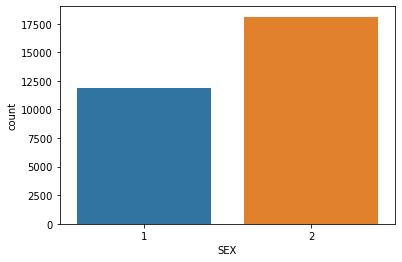

In [16]:
sns.countplot(df["SEX"])

In [17]:
df["EDUCATION"].value_counts() # here 0 could be missing data

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

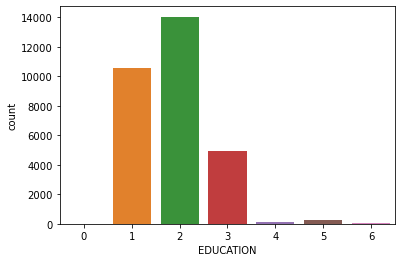

In [18]:
sns.countplot(df["EDUCATION"]) # maximum university passouts

In [19]:
df["MARRIAGE"].value_counts() # here 0 could be missing data

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

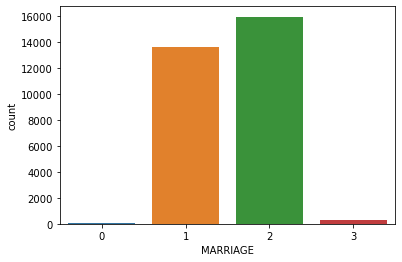

In [20]:
sns.countplot(df["MARRIAGE"])

In [21]:
#how many rows contain missing values considering 0 as missing data

In [22]:
len(df.loc[(df["EDUCATION"]==0) | (df["MARRIAGE"]==0)])

68

In [23]:
#68 of 30000 have missing values

In [24]:
# since less than 1% of entire dataset has missing values we can remove those rows from the dataset

In [25]:
new_df=df.loc[(df["EDUCATION"]!=0 ) & (df["MARRIAGE"]!=0)]

In [26]:
new_df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [27]:
new_df["EDUCATION"].value_counts()

2    14024
1    10581
3     4873
5      280
4      123
6       51
Name: EDUCATION, dtype: int64

In [28]:
len(new_df)

29932

In [29]:
#svm doesnt work well with large dataset so we will downsample the data (take a lot of time to train)

In [30]:
# downsample the dataset to get 1000 of each category first split data into 2 categories ie defaulted and not defaulted

In [31]:
df_no_default=new_df[new_df["default"]==0]
df_default=new_df[new_df["default"]==1]

In [32]:
df_nodefault_downsample=resample(df_no_default,
                                replace=False,
                                n_samples=1000,
                                random_state=42
                                )

In [33]:
df_default_downsample=resample(df_default,
                              replace=False,
                              n_samples=1000,
                              random_state=42)

In [34]:
df_downsample=pd.concat([df_nodefault_downsample,df_default_downsample])

In [35]:
df_downsample.head(6)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
641,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0
14959,20000,1,2,2,28,0,0,0,0,0,...,10707,10539,10757,1500,1200,378,389,400,600,0


In [36]:
X=df_downsample.drop("default",axis=1)
Y=df_downsample["default"].copy()

In [37]:
Y.head(5)

641      0
4678     0
16004    0
22974    0
17535    0
Name: default, dtype: int64

In [38]:
# sex ,education,marriage,pay is supposed to be categorical

In [39]:
x_encoded=pd.get_dummies(X,columns=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])

### going to use Radial Basis Function with SVM that assumes that the data is scaled with mean 0 and std=1

In [40]:
# split the data into training and testing before scaling inorder to prevent data leakage

In [41]:
X_train,X_test,y_train,y_test=train_test_split(x_encoded,Y,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [42]:
X_train_scaled

array([[ 1.06764453,  0.66459398, -0.69871481, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [ 0.11806446, -0.8151    ,  0.04305464, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-0.51498893, -0.92079242, -0.36636674, ...,  0.        ,
        -0.0365392 , -0.05170877],
       ...,
       [ 1.22590788, -0.39233029,  3.60225397, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-0.27759391,  1.61582582, -0.69871481, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-1.06891064, -1.34356213, -0.47601594, ...,  0.        ,
        -0.0365392 , -0.05170877]])

In [43]:
X_train.shape,X_test.shape

((1500, 81), (500, 81))

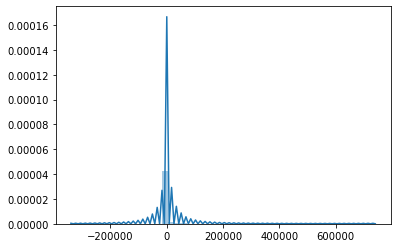

In [44]:
sns.distplot(X_train)

In [48]:
clf_svm=SVC(random_state=42) #makes untrained shell of svc
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

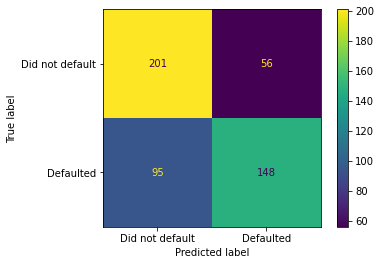

In [49]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format="d",
                     display_labels=["Did not default","Defaulted"])

### Out of 257 people who did not default about 201 or 79% were correctly classified and of the 243 people  that defaulted only 148 or 61 % were correctly classified So SVM did not perform very well we can improve predictions using cross validation to optimize parameters.

In [50]:
# using GridSearchCV

### for Radial Basis Function and SVM we have 2 parameters C and gamma. C is the number of missclassified observations to allow. gamma is the hyperparameter for rbf kernel

In [52]:
param_grid=[
    {'C':[0.5,1,5,10,100],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']
        
    },
]

In [53]:
optimal_params=GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy",verbose=2)

In [55]:
optimal_params.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.3s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ..................... C=5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=5, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=5, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=5, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=5, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=5, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=5, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ......................... C=5, gamma=1, kernel=rbf, total=   0.3s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ......................... C=5, gamma=1, kernel=rbf, total=   0.3s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] ................... C=100, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] ................... C=100, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] ................... C=100, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] ................... C=100, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] ................... C=100, gamma=scale, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   36.9s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 5, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [57]:
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [58]:
clf_svm=SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

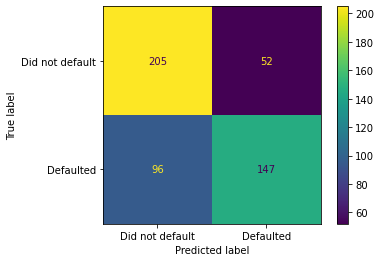

In [59]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format="d",
                     display_labels=["Did not default","Defaulted"])

In [60]:
# little bit better than before 4 more people classified as did not default correctly

In [63]:
len(df_downsample.columns)

24

### There are 24 columns and it would require 24-dimensional graph, one dimension per feature used to make predictions to plot the data in its raw. We can pick two features at random to use as x and y-axis on our graph or we can us PCA to combine 24 features into 2 orthogonal meta features that we can use as axis for our graph. 
### It is important to first determine how accurate the shrunken graph will be , if its relatively accurate than it makes sense to draw the 2-D graph , if not then the shrunken graph will not be usefull.
### we can determine the accuracy of the graph using scree plot. 

In [64]:
pca=PCA() # by default pca centers the data but does not scale it
X_train_pca=pca.fit_transform(X_train_scaled)



In [68]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
per_var

array([11.3,  6.4,  6.2,  5.9,  5.2,  4.8,  4.4,  3.6,  3.1,  2.7,  2.6,
        2.4,  2.2,  2. ,  1.9,  1.8,  1.6,  1.5,  1.5,  1.4,  1.4,  1.4,
        1.3,  1.3,  1.3,  1.3,  1.2,  1.1,  1.1,  1.1,  1. ,  1. ,  0.9,
        0.9,  0.9,  0.8,  0.8,  0.8,  0.7,  0.7,  0.7,  0.6,  0.6,  0.5,
        0.5,  0.4,  0.4,  0.4,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.2,
        0.2,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ])

In [69]:
labels=[str(x) for x in range(1,len(per_var)+1)]
labels

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81']

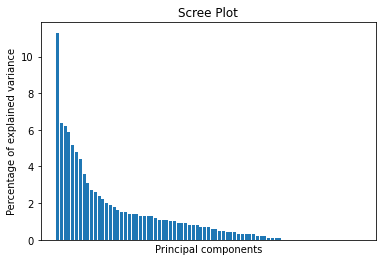

In [72]:
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal components")
plt.title("Scree Plot")
plt.show()

### the scree plot shows that the first principal component PC1 accounts for a relatively large amount of variation in the raw data and this means that it will be a good candidate for the x axis in the 2d graph however PC2 is not much different from pc3 and pc4 which doesnt bode well for dimension reduction. 

In [73]:
# now we optimize the svm to fit pc1 and pc2

In [74]:
train_pc1_coords=X_train_pca[:,0] # contains x axis coordinate of data after pca
train_pc2_coords=X_train_pca[:,1] # contains y axis coordinate of data after pca

In [75]:
train_pc1_coords

array([-4.42355092,  2.17834589,  1.41054373, ...,  7.55857478,
       -3.33763518, -0.06486051])

In [79]:
pca_trained_scaled=scale(np.column_stack((train_pc1_coords,train_pc2_coords)))
pca_trained_scaled

array([[-1.47993697,  0.23720934],
       [ 0.72878434, -0.65025644],
       [ 0.47190952, -0.77521813],
       ...,
       [ 2.52878614,  0.08642835],
       [-1.11663453,  0.01231917],
       [-0.02169964, -0.25601971]])

In [80]:
param_grid=[
    {'C':[0.5,1,5,10,100],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']
        
    },
]

In [81]:
optimal_params=GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy",verbose=2)

In [83]:
optimal_params.fit(pca_trained_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.1s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] 

[CV] ......................... C=5, gamma=1, kernel=rbf, total=   0.1s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ......................... C=5, gamma=1, kernel=rbf, total=   0.0s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ......................... C=5, gamma=1, kernel=rbf, total=   0.1s
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ......................... C=5, gamma=1, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=5, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ................... C=100, gamma=scale, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    8.6s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 5, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [85]:
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [87]:
clf_svm=SVC(random_state=42,C=10,gamma=0.01,kernel='rbf')

In [88]:
clf_svm.fit(pca_trained_scaled,y_train)

SVC(C=10, gamma=0.01, random_state=42)

In [89]:
#transform the test dataset with pca

In [92]:
X_test_pca=pca.transform(X_train_scaled)
test_pc1_coords=X_test_pca[:,0]
test_pc2_coords=X_test_pca[:,1]


In [93]:
# create a matrix of points that we can use to show the decision boundary
# The matrix will be a little bit larger than the transformed PCA points so that we plot all of the PCA points on it
# withou them being on the edge

x_min=test_pc1_coords.min()-1
x_max=test_pc1_coords.max()+1

y_min=test_pc2_coords.min()-1
y_max=test_pc2_coords.max()+1


In [94]:
# The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values
#So, for example, if we want to create a grid where we have a point at each integer value between 0 and 4 in both 
#the x and y directions. To create a rectangular grid, we need every combination of the x and y points.

In [95]:
xx,yy=np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),
                 np.arange(start=y_min,stop=y_max,step=0.1))

In [98]:
 np.arange(start=y_min,stop=y_max,step=0.1)

array([-4.57524582e+00, -4.47524582e+00, -4.37524582e+00, -4.27524582e+00,
       -4.17524582e+00, -4.07524582e+00, -3.97524582e+00, -3.87524582e+00,
       -3.77524582e+00, -3.67524582e+00, -3.57524582e+00, -3.47524582e+00,
       -3.37524582e+00, -3.27524582e+00, -3.17524582e+00, -3.07524582e+00,
       -2.97524582e+00, -2.87524582e+00, -2.77524582e+00, -2.67524582e+00,
       -2.57524582e+00, -2.47524582e+00, -2.37524582e+00, -2.27524582e+00,
       -2.17524582e+00, -2.07524582e+00, -1.97524582e+00, -1.87524582e+00,
       -1.77524582e+00, -1.67524582e+00, -1.57524582e+00, -1.47524582e+00,
       -1.37524582e+00, -1.27524582e+00, -1.17524582e+00, -1.07524582e+00,
       -9.75245822e-01, -8.75245822e-01, -7.75245822e-01, -6.75245822e-01,
       -5.75245822e-01, -4.75245822e-01, -3.75245822e-01, -2.75245822e-01,
       -1.75245822e-01, -7.52458223e-02,  2.47541777e-02,  1.24754178e-01,
        2.24754178e-01,  3.24754178e-01,  4.24754178e-01,  5.24754178e-01,
        6.24754178e-01,  

In [100]:
# now we will classify every point in that ,atrix with the svm . Points on one side of the classification boundary will get 0
# and points on the other side will be 1
Z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))

In [101]:
#xx.ravel() converts into ndarray

array([-6.01996484, -5.91996484, -5.81996484, ..., 12.88003516,
       12.98003516, 13.08003516])

In [111]:
Z

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
# Z is just a long array of 0 and 1 which reflect how each point in the mesh was classified 
# we use reshape() so that each classification(0 or 1) corresponds to a specific point in the matrix


In [113]:
Z=Z.reshape(xx.shape)

In [114]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

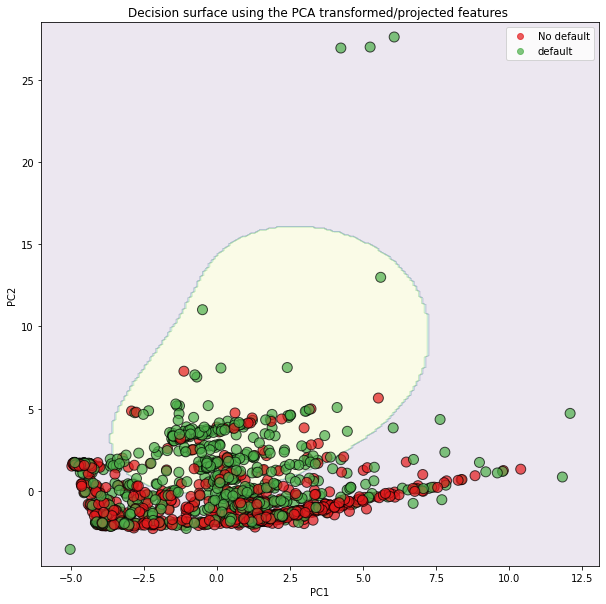

In [141]:
fig,ax=plt.subplots(figsize=(10,10))


# now we will use contourf() to draw  a filled contour plot using the matrix values and classification 
# the contours will bve filled according to the predicted classifications (0s and 1s) in Z


ax.contourf(xx,yy,Z,alpha=0.1)

# custom colors for the actual data points

cmap=colors.ListedColormap(['#e41a1c',"#4daf4a"])

#now draw the actual datapoints these will be coloured by their known(not predicted ) classification 
# note : setting alpha =0.7 lets us see if we are covering up a point 

scatter=ax.scatter(test_pc1_coords,test_pc2_coords,c=y_train,cmap=cmap,s=100,edgecolors="k",alpha=0.7)

legend=ax.legend(scatter.legend_elements()[0],
                scatter.legend_elements()[1],
                loc="upper right")
legend.get_texts()[0].set_text("No default")
legend.get_texts()[1].set_text("default")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed/projected features ')
#plt.savefig('svm1.png')
plt.show()

# Note: 

### The lightblue part of the graph is the area where all datapoints will be predicted to have not defaulted. the white part of the graph is the area where all the datapoints will be predicted to have defaulted . the dots are datapoints in the training set and are colored by their known classification. 